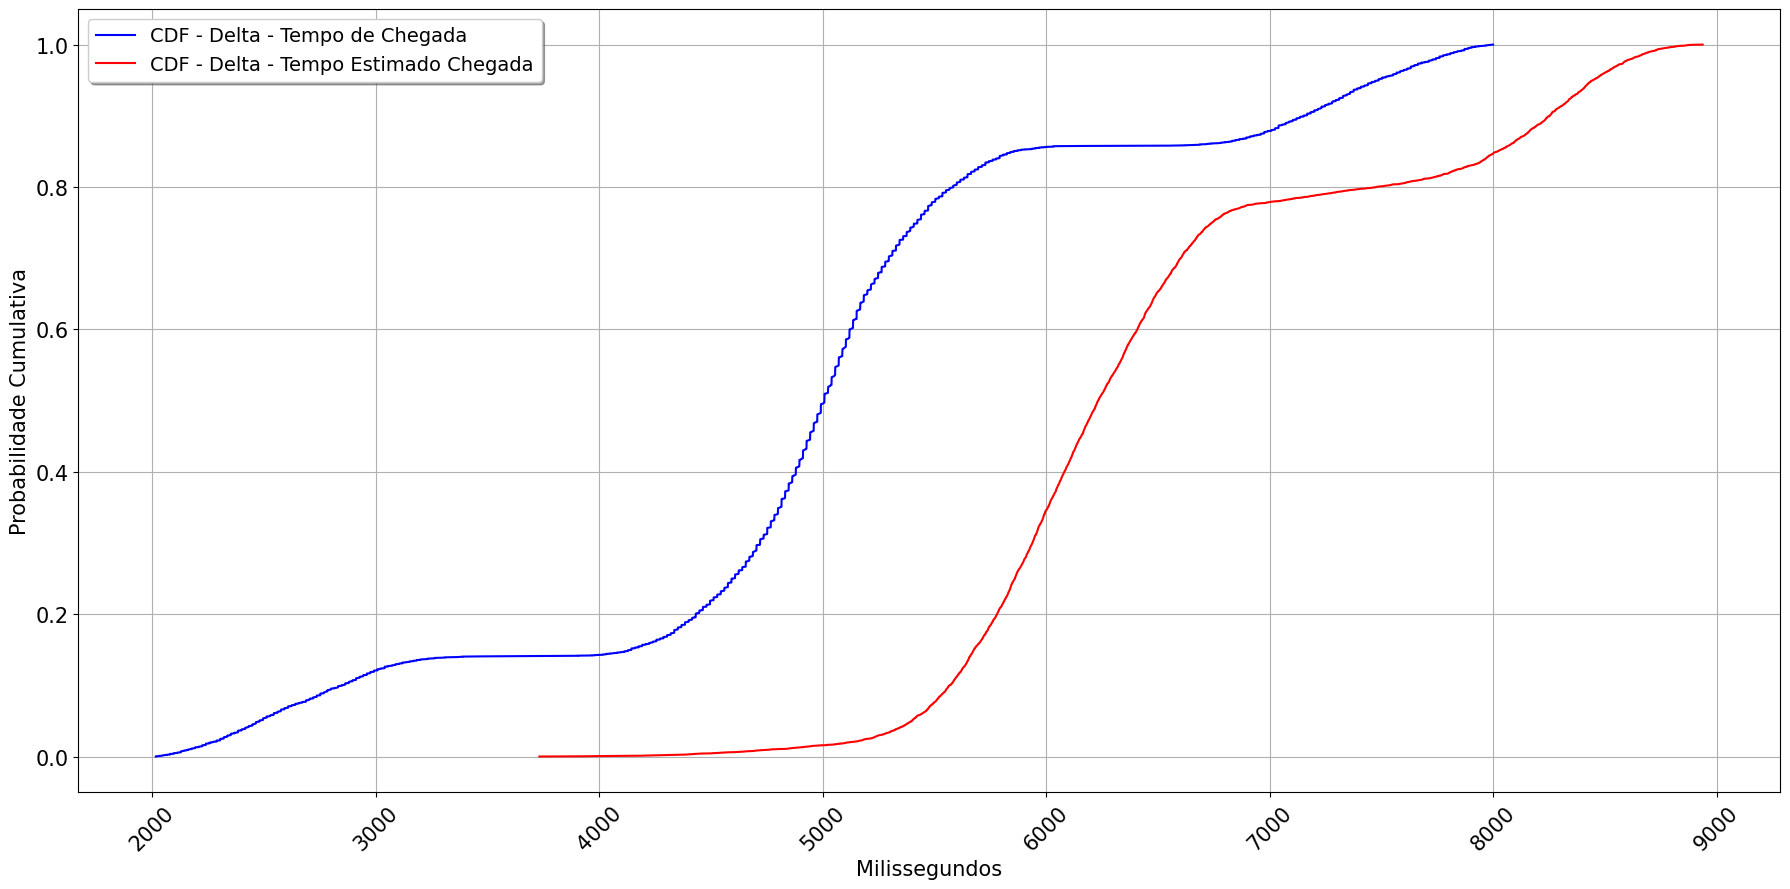

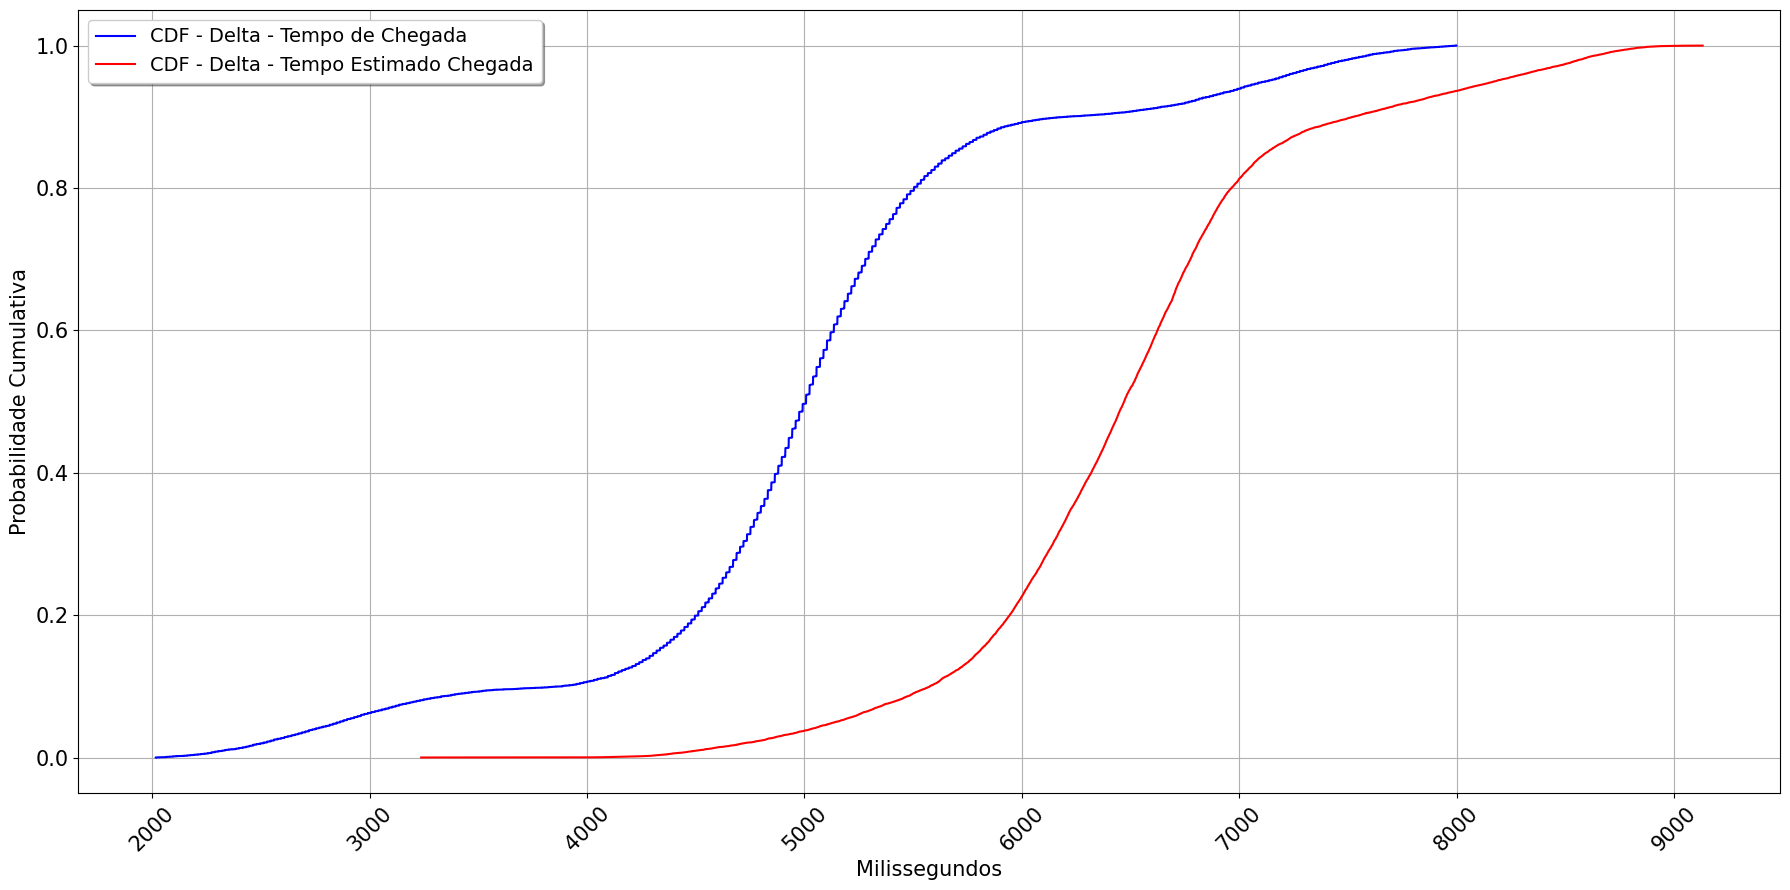

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.distributions.empirical_distribution import ECDF

def processar_e_gerar_grafico_cdf(file_path, device_id, min_delta_arrival, max_delta_arrival):
    # Carregamento dos dados
    data = pd.read_excel(file_path)

    # Filtro dos dados para um dispositivo específico e dentro dos limites de 'Delta-arrival'
    device_data = data[(data['dev'] == device_id) & 
                       (data['Delta-arrival'] >= min_delta_arrival) & 
                       (data['Delta-arrival'] <= max_delta_arrival) & 
                       (data['Ea-grafico'] >= 0)].copy()

    # Conversão da coluna 'arrival' de nanosegundos para horas
    device_data['hours'] = device_data['arrival'] / (1e9 * 60 * 60)

    # Preparação do gráfico
    plt.figure(figsize=(18, 9))

    # Cálculo da C.D.F. para 'Delta-arrival' e 'Ea-grafico'
    ecdf_delta_arrival = ECDF(device_data['Delta-arrival'])
    ecdf_ea_grafico = ECDF(device_data['Ea-grafico'])

    # Plotagem das C.D.F.s
    plt.plot(ecdf_delta_arrival.x, ecdf_delta_arrival.y, color='blue', label='CDF - Delta - Tempo de Chegada')
    plt.plot(ecdf_ea_grafico.x, ecdf_ea_grafico.y, color='red', label='CDF - Delta - Tempo Estimado Chegada')

    # Configuração de rótulos e título
    plt.xlabel('Milissegundos', fontsize=15)
    plt.ylabel('Probabilidade Cumulativa', fontsize=15)
    plt.title('', fontsize=15)

    # Ajuste dos rótulos do eixo X e Y
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15)

    # Exibição da grade
    plt.grid(True)

    # Adicionando a legenda
    plt.legend(loc='upper left', fontsize=14, shadow=True)

    # Ajuste do layout
    plt.tight_layout()

    # Salvar o gráfico em um arquivo
    excel_dir = os.path.dirname(file_path)
    caminho_grafico_pdf = os.path.join(excel_dir, f"cdf_grafico_dispositivo_{device_id}.pdf")
    plt.savefig(caminho_grafico_pdf, dpi=600)
    
   # Exibir o gráfico e fechar
    plt.show()
    plt.close()

# Definição dos limites de 'Delta-arrival'
min_delta_arrival = 2000  # Exemplo de tempo mínimo
max_delta_arrival = 8000  # Exemplo de tempo máximo

# Lista de IDs de dispositivos desejados
device_ids = [5]  # Substitua pelos IDs dos dispositivos desejados

# Lista de endereços de arquivos
caminhos = [
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/grenoble/5 segundos - 7_Experimento_389054/tempoProximoHeartbeat.xlsx",
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/strasbourg/5 segundos - 7_Experimento_389053/tempoProximoHeartbeat.xlsx"
]

# Processar cada arquivo na lista
for caminho in caminhos:
    for device_id in device_ids:
        processar_e_gerar_grafico_cdf(caminho, device_id, min_delta_arrival, max_delta_arrival)
